In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/Users/usrva/OneDrive/Desktop/Projects/Job family classification/Master Job Role (2).csv")
# taking only job role and job family column
df = df[["Job Role", "Job Family"]]
df.head()

,Job Role,Job Family
0,Applications Developer/Engineer,"Software Developers, Applications"
1,Backend Engineer,"Software Developers, Applications"
2,Frontend Engineer,"Software Developers, Applications"
3,Full Stack Engineer,"Software Developers, Applications"
4,Android Developer,"Software Developers, Mobile Applications"


In [3]:
df.shape

(2661, 2)

Text(0, 0.5, 'Frequency')

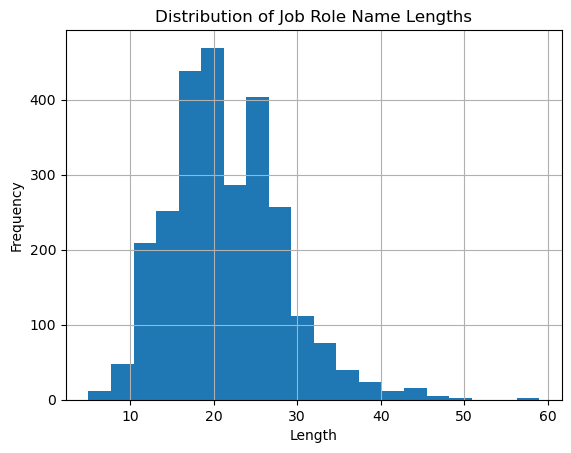

In [4]:
import matplotlib.pyplot as plt
# job role len distribution
df['Job Role'].str.len().hist(bins=20)
plt.title('Distribution of Job Role Name Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Job Family')

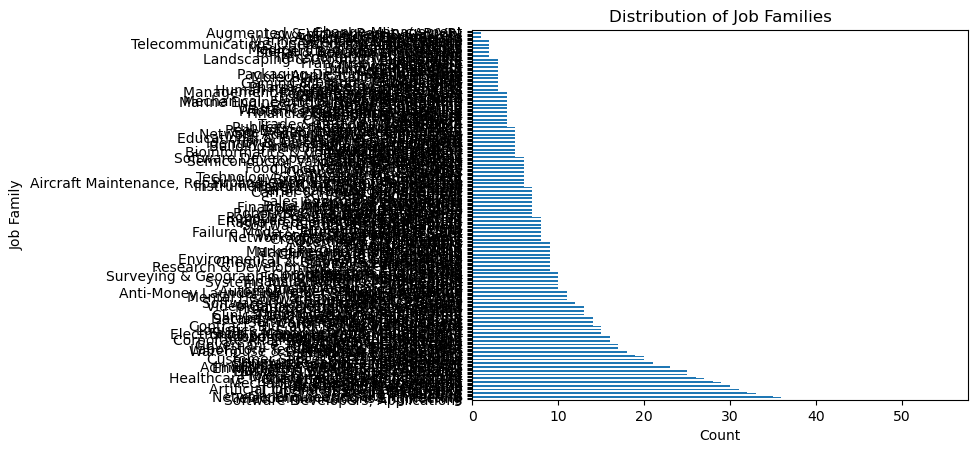

In [5]:
import matplotlib.pyplot as plt
# job family count bar chart
df['Job Family'].value_counts().plot(kind='barh')
plt.title('Distribution of Job Families')
plt.xlabel('Count')
plt.ylabel('Job Family')

In [6]:
pd.set_option('display.max_rows', None)
df['Job Family'].value_counts()

Job Family
Software Developers, Applications                               55
Telecommunications Engineering                                  36
Network Engineering & Architecture                              35
General & Specialty Physicians                                  34
Lending                                                         33
Media Production                                                32
Strategy & Planning                                             31
IT Operations & Infrastructure                                  31
Artificial Intelligence & Data Science                          31
Allied Health Professionals                                     30
Business Transformation                                         30
Procurement & Sourcing                                          29
Mechanical Design & Engineering                                 29
Product Management                                              28
IT Architecture & Solutions                        

In [7]:
# taking only job family count greater than 24
job_family_counts = df['Job Family'].value_counts()

filtered_data = df[df['Job Family'].isin(job_family_counts[job_family_counts > 24].index)]

In [8]:
X = filtered_data["Job Role"]
y = filtered_data['Job Family']

In [9]:
# encoding catogories
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Converting into job role into Vector using Tfidf
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [10]:
# spliting data training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# oversampling using SMOTE because data is imblanced
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
# using randomforest for classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [12]:
#calculating metrics f1score - 0.73
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         6
           2       1.00      0.67      0.80         6
           3       0.57      0.80      0.67         5
           4       1.00      0.33      0.50         6
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         5
           7       0.37      1.00      0.54         7
           8       0.80      0.80      0.80         5
           9       0.75      1.00      0.86         6
          10       0.62      0.83      0.71         6
          11       0.67      0.86      0.75         7
          12       0.33      0.50      0.40         6
          13       1.00      0.50      0.67         6
          14       1.00      0.71      0.83         7
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         6
          17       1.00    

In [13]:
# checking with Job roles
new_job_roles = ['Site Reliability Engineer (SRE)', 'Technical Support Engineer']
new_job_roles_tfidf = vectorizer.transform(new_job_roles)
predictions = model.predict(new_job_roles_tfidf)
predicted_labels = label_encoder.inverse_transform(predictions)
print(predicted_labels)

['Telecommunications Engineering' 'Telecommunications Engineering']


In [14]:
#Hyper-tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [18]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
868 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\usrva\anaconda3\Lib\site-pack

Best parameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [19]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# After hyper tuning f1score - 0.81
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      0.33      0.44         6
           2       1.00      0.67      0.80         6
           3       0.80      0.80      0.80         5
           4       1.00      0.83      0.91         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.46      0.86      0.60         7
           8       0.80      0.80      0.80         5
           9       0.75      1.00      0.86         6
          10       0.80      0.67      0.73         6
          11       1.00      1.00      1.00         7
          12       0.50      1.00      0.67         6
          13       0.57      0.67      0.62         6
          14       1.00      0.71      0.83         7
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         6
          17       1.00    

In [18]:
# using support vector machine f1-score - 0.83
svm = SVC(kernel='linear')
svm.fit(X_train_resampled, y_train_resampled)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      0.33      0.44         6
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         5
           4       1.00      0.83      0.91         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.40      0.86      0.55         7
           8       0.80      0.80      0.80         5
           9       0.71      0.83      0.77         6
          10       0.86      1.00      0.92         6
          11       1.00      1.00      1.00         7
          12       0.60      1.00      0.75         6
          13       0.60      0.50      0.55         6
          14       1.00      0.71      0.83         7
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         6
          17       1.00    

In [22]:
# Hyper Tuning svm using grid search f1 score - 0.82
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

grid.fit(X_train_resampled, y_train_resampled)
best_params = grid.best_params_

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.1s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.2s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ...................

In [23]:
best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_resampled, y_train_resampled)

y_pred = best_svm.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      0.33      0.44         6
           2       1.00      0.67      0.80         6
           3       0.83      1.00      0.91         5
           4       1.00      0.83      0.91         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       0.40      0.86      0.55         7
           8       0.80      0.80      0.80         5
           9       0.71      0.83      0.77         6
          10       0.86      1.00      0.92         6
          11       1.00      1.00      1.00         7
          12       0.60      1.00      0.75         6
          13       0.60      0.50      0.55         6
          14       1.00      0.71      0.83         7
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         6
          17       1.00    

In [26]:
len(df['Job Family'].unique())

271